In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!ls'/content/drive/Churn_Modelling.csv'

/bin/bash: line 1: ls/content/drive/Churn_Modelling.csv: No such file or directory


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
df=pd.read_csv('/content/drive/My Drive /Churn_Modelling.csv')

In [51]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.shape

(10000, 14)

In [53]:
df.drop('RowNumber',inplace=True,axis=1)
df.drop('CustomerId',inplace=True,axis=1)
df.drop('Surname',inplace=True,axis=1)

<Axes: >

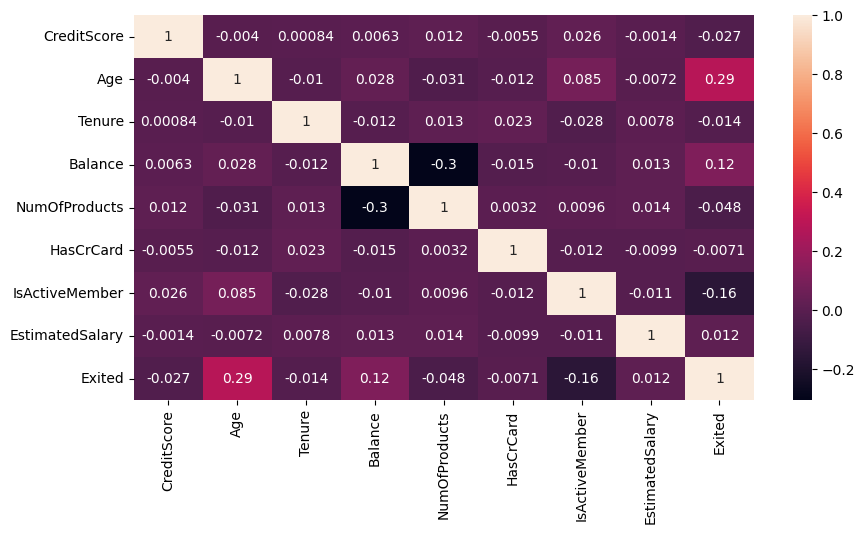

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [55]:
numeric = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        numeric.append(i)

In [56]:
numeric

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

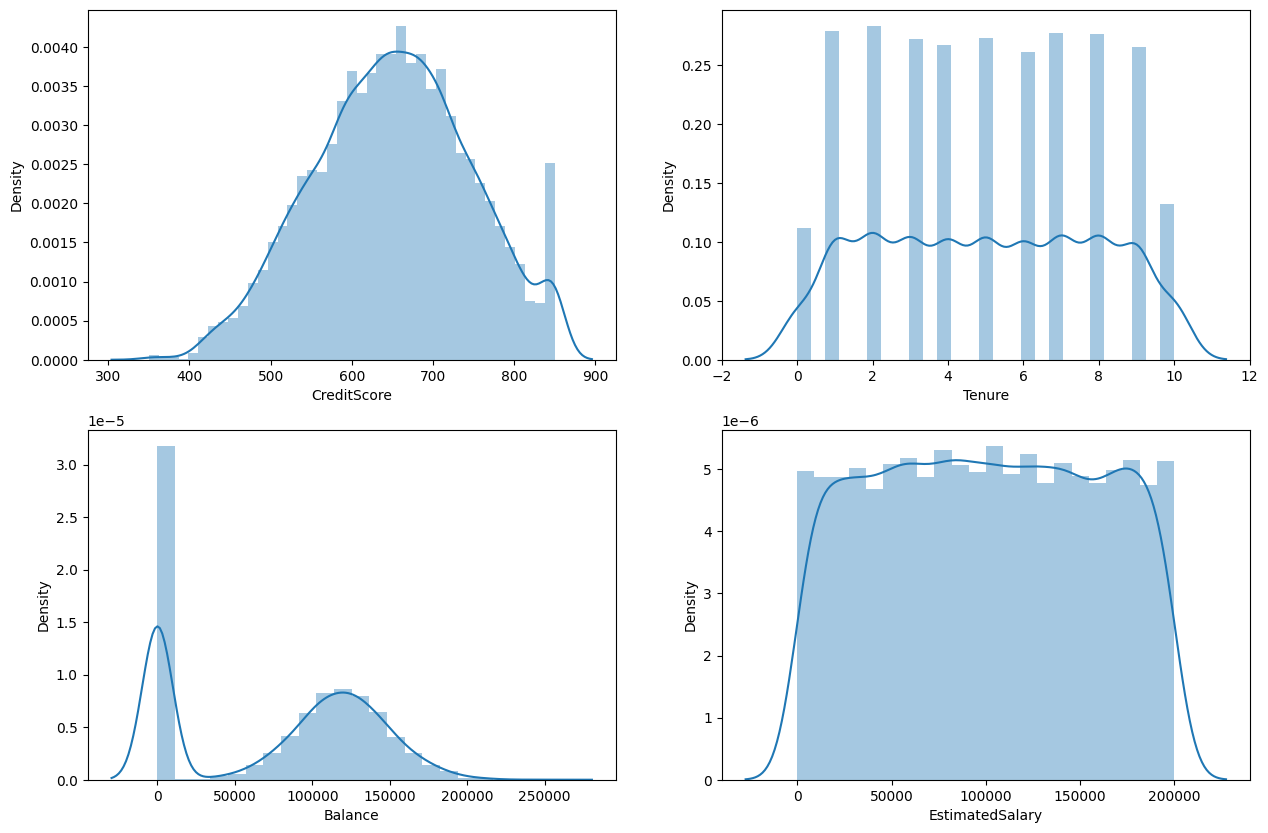

In [57]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
sns.distplot(df['CreditScore'], ax=axes[0, 0])
sns.distplot(df['Tenure'], ax=axes[0, 1])
sns.distplot(df['Balance'], ax=axes[1, 0])
sns.distplot(df['EstimatedSalary'], ax=axes[1, 1])

<Axes: ylabel='CreditScore'>

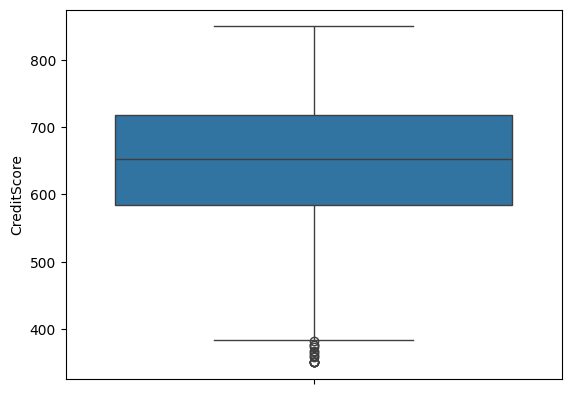

In [58]:
sns.boxplot(df['CreditScore'])

<Axes: xlabel='Geography', ylabel='Balance'>

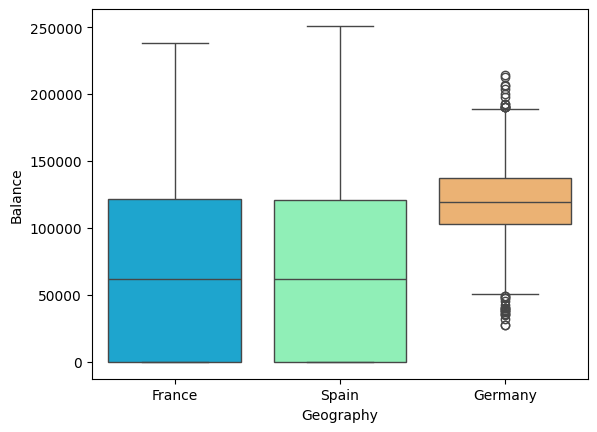

In [59]:
sns.boxplot(data=df,x ='Geography',y='Balance',palette='rainbow')

In [60]:

df_germany = df[df['Geography'] == 'Germany']

Q1 = df_germany['Balance'].quantile(0.25)
Q3 = df_germany['Balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_germany[(df_germany['Balance'] < lower_bound) | (df_germany['Balance'] > upper_bound)]

df.drop(outliers.index, inplace=True)


<Axes: xlabel='Geography', ylabel='Balance'>

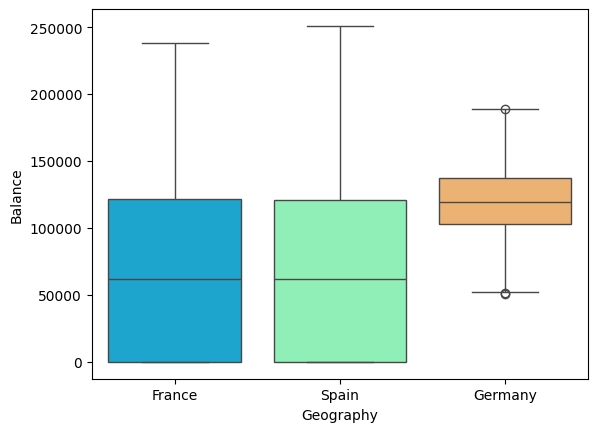

In [61]:
sns.boxplot(data=df,x='Geography',y='Balance',palette='rainbow')

<Axes: xlabel='Gender', ylabel='count'>

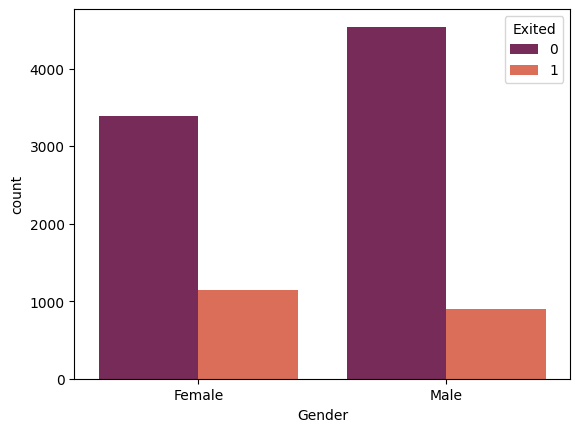

In [62]:
sns.countplot(x='Gender',data=df,hue='Exited',palette='rocket')

<Axes: xlabel='Geography', ylabel='count'>

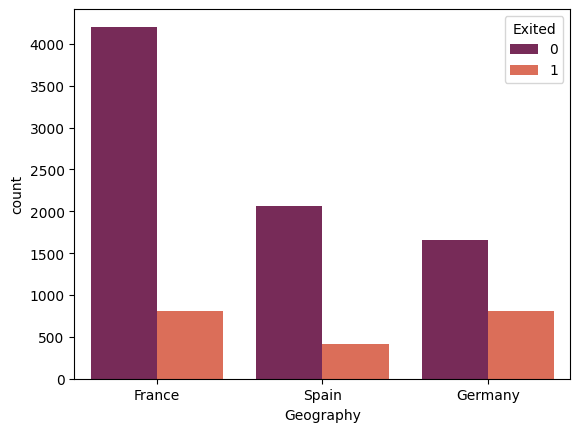

In [63]:

sns.countplot(x='Geography',data=df,hue='Exited',palette='rocket')

<Axes: xlabel='CreditScore', ylabel='Count'>

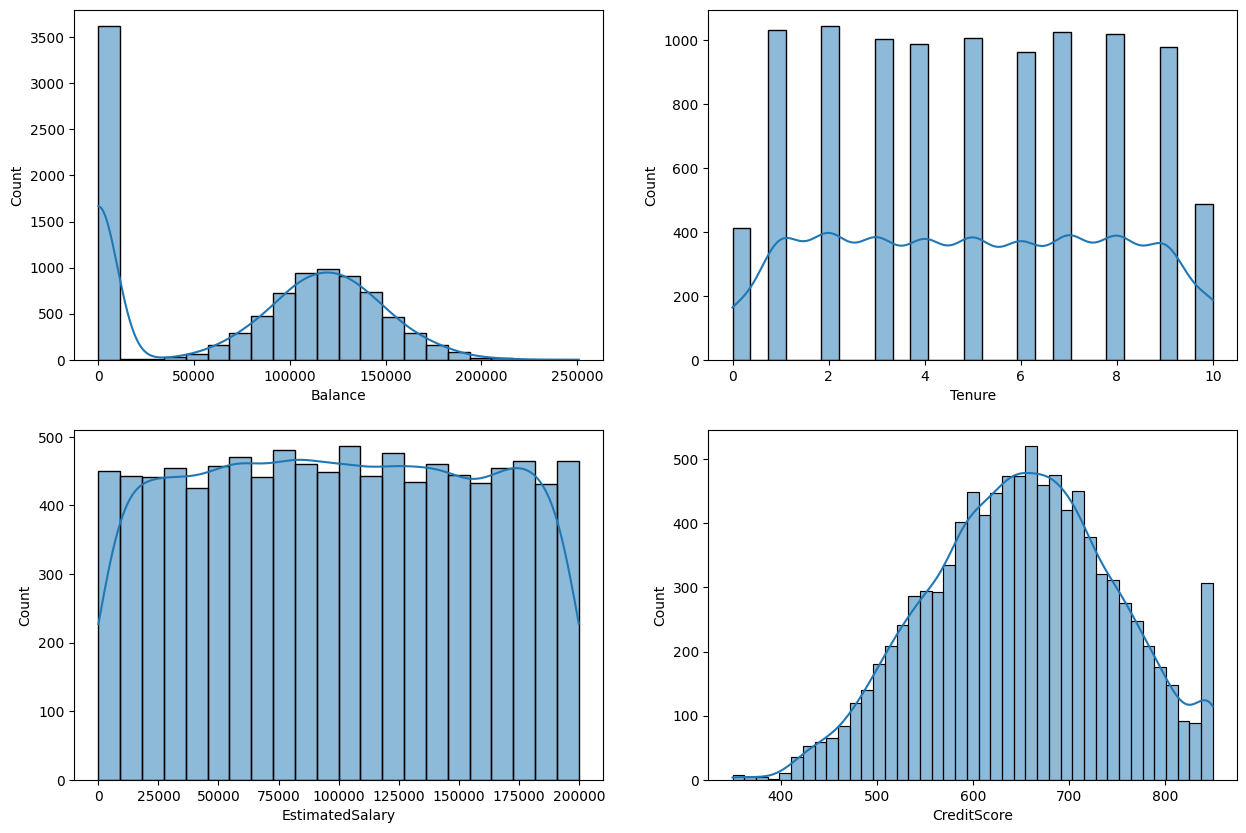

In [64]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
sns.histplot(x=df['Balance'],kde=True, ax=axes[0, 0])
sns.histplot(x=df['Tenure'],kde=True,ax=axes[0,1])
sns.histplot(x=df['EstimatedSalary'],kde=True,ax=axes[1,0])
sns.histplot(x=df['CreditScore'],kde=True,ax=axes[1,1])

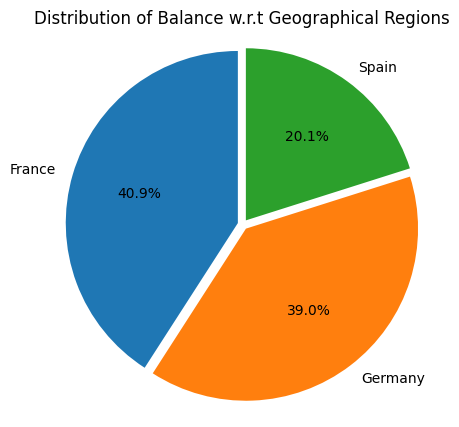

In [65]:
geo_balance = df.groupby('Geography')['Balance'].sum()


ex = [0.03, 0.03, 0.03]


plt.figure(figsize=(5, 5))
plt.pie(geo_balance, labels=geo_balance.index, explode=ex, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Balance w.r.t Geographical Regions')
plt.axis('equal')  # Makes the pie chart circular
plt.show()

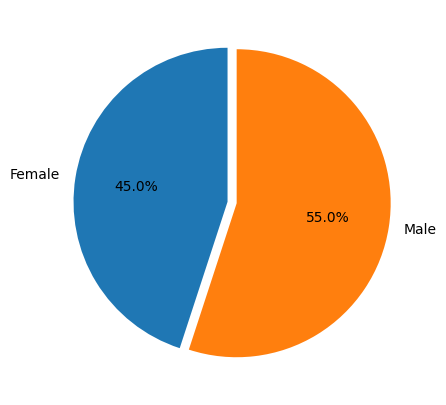

In [66]:
gen_ballance = df.groupby('Gender')['Balance'].sum()
ex = [0.03, 0.03]
plt.figure(figsize=(5, 5))
plt.pie(gen_ballance, labels=gen_ballance.index, explode=ex, autopct='%1.1f%%', startangle=90)
plt.show()


<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

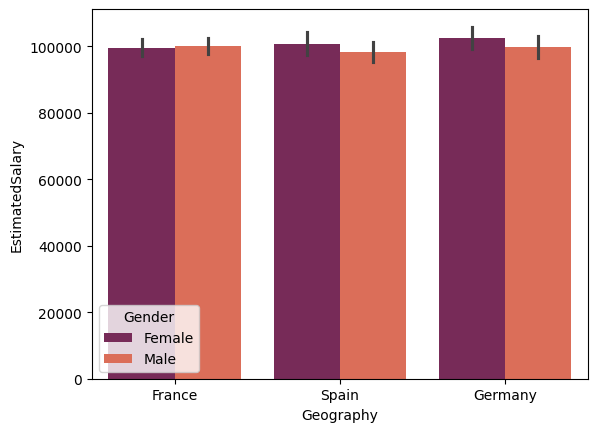

In [67]:
figsize=(20,20)
sns.barplot(data=df,x='Geography',y='EstimatedSalary',hue='Gender',palette='rocket')

<Axes: xlabel='Geography', ylabel='Balance'>

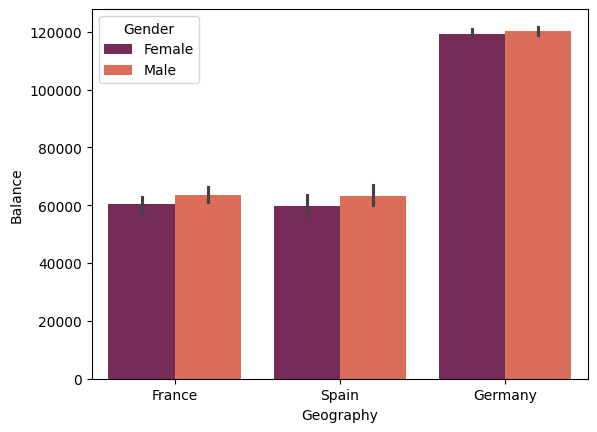

In [68]:
sns.barplot(data=df,x='Geography',y='Balance',hue='Gender',palette='rocket')

<Axes: xlabel='Geography', ylabel='Balance'>

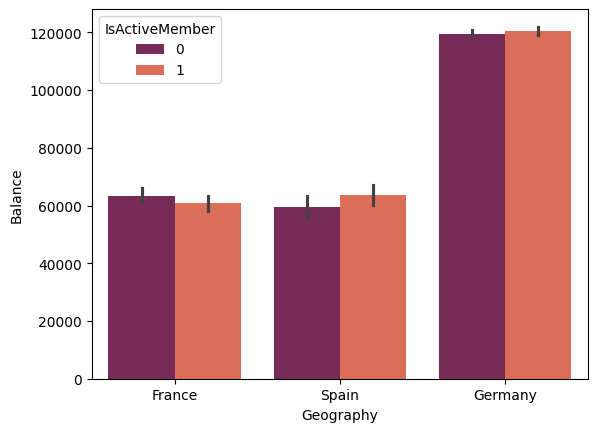

In [69]:
sns.barplot(data=df,x='Geography',y='Balance',hue='IsActiveMember',palette='rocket')

In [70]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Balance'] = sc.fit_transform(df['Balance'].values.reshape(-1, 1))
df['CreditScore'] = sc.fit_transform(df['CreditScore'].values.reshape(-1, 1))

In [73]:
df['EstimatedSalary'] = sc.fit_transform(df['EstimatedSalary'].values.reshape(-1, 1))

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.325858,0,0,42,2,-1.225938,1,1,1,0.021711,1
1,-0.439615,2,0,41,1,0.119128,1,0,1,0.216345,0
2,-1.535814,0,0,42,8,1.336522,3,1,0,0.240496,1
3,0.501462,0,0,39,1,-1.225938,2,0,0,-0.109085,0
4,2.063028,2,0,43,2,0.788436,1,1,1,-0.365426,0


In [75]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4611,-0.987714,1,1,48,3,1.053967,2,0,1,-0.364545
5144,-1.711619,0,0,25,3,0.932181,1,1,1,0.228925
3699,1.018537,0,1,37,10,1.744224,2,1,1,0.598604
3732,0.739316,0,1,46,6,-1.225938,1,1,1,-0.107502
4547,2.063028,1,1,37,9,0.740216,1,0,1,1.731717
...,...,...,...,...,...,...,...,...,...,...
5750,0.997854,1,1,37,9,0.953192,3,1,0,-0.254381
5206,-1.628887,0,1,38,3,0.924791,1,1,0,-0.182954
5406,-1.391033,0,0,47,6,0.529663,1,0,0,0.369755
863,0.687609,0,1,53,6,-1.225938,2,0,1,-0.043216


In [78]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [80]:
ann_model = Sequential()
ann_model

<Sequential name=sequential_1, built=False>

In [81]:
ann_model.add(Dense(units=3, activation='sigmoid',input_dim=10))
ann_model.add(Dense(units=3, activation='sigmoid',input_dim=10))
ann_model.add(Dense(units=3, activation='sigmoid',input_dim=10))
ann_model.add(Dense(units=3, activation='sigmoid',input_dim=10))
ann_model.add(Dense(units=3, activation='sigmoid',input_dim=10))

In [82]:
ann_model.add(Dense(units=1, activation='sigmoid'))

In [83]:
ann_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85 (340.00 B)

 Trainable params: 85 (340.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','precision','recall'])

In [85]:
ann_model.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2)

Epoch 1/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5079 - loss: 0.6837 - precision: 0.2022 - recall: 0.4849 - val_accuracy: 0.8069 - val_loss: 0.5735 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7895 - loss: 0.5642 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8069 - val_loss: 0.5137 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7842 - loss: 0.5294 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8069 - val_loss: 0.4969 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7944 - loss: 0.5105 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8069 - val_loss: 0.4929 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7841 - loss: 0.5217 - precision: 0.000

In [89]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [90]:
y_pred = ann_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
CM = confusion_matrix(y_test, y_pred)
print("\n",CM,"\n")

accuracy_score(y_test, y_pred)


 [[1529   71]
 [ 265  129]] 



0.831494483450351

In [92]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.325858,0,0,42,2,-1.225938,1,1,1,0.021711
1,-0.439615,2,0,41,1,0.119128,1,0,1,0.216345
2,-1.535814,0,0,42,8,1.336522,3,1,0,0.240496
3,0.501462,0,0,39,1,-1.225938,2,0,0,-0.109085
4,2.063028,2,0,43,2,0.788436,1,1,1,-0.365426


In [95]:
from sklearn.preprocessing import StandardScaler
new_sc = StandardScaler()
new_sc.fit(X_train) # Fit the scaler on the training data X_train which has 10 features

if ann_model.predict(new_sc.transform([[700, 0, 0,42,2, 80000, 1, 1, 1, 90000]])) > 0.5:
  print("Customer will leave the bank")
else:
  print("Customer will stay")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Customer will stay
